<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

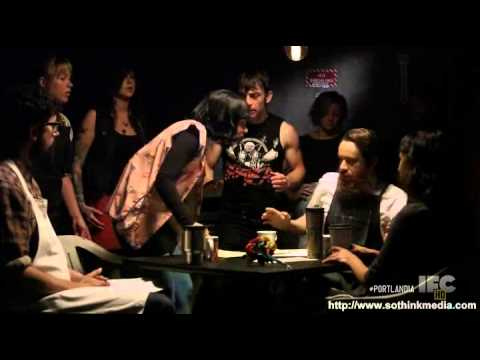

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [6]:
%pwd

'/tmp/3f9a627c-e418-435d-af53-844416ee1372'

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [8]:
# Start here 
# removing the extra words from the star rating
shops['star_rating'] = shops['star_rating'].apply(lambda x: float(x.strip('star rating')))
shops['star_rating'].head()



0    5.0
1    4.0
2    4.0
3    2.0
4    4.0
Name: star_rating, dtype: float64

In [9]:
# removing the data from the review and making it its own column

shops['review_date'] = shops['full_review_text'].apply(lambda x: x.split()).apply(lambda x: x[0])
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.split()).apply(lambda x: x[1:]).apply(lambda x: ' '.join(x))
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


In [10]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [11]:
from tqdm import tqdm
tqdm.pandas()

In [12]:
STOP_WORDS = ['check', 'coffee', 'place']


In [13]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            if token.text not in STOP_WORDS:
                lemmas.append(token.lemma_.lower())
    
    return lemmas

shops['lemmas'] = shops['full_review_text'].progress_apply(get_lemmas)
shops.head()

100%|██████████| 7616/7616 [16:44<00:00,  7.58it/s]


,coffee_shop_name,full_review_text,star_rating,review_date,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016,"[1, love, love, love, atmosphere, corner, shop..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016,"[1, list, brunch, spots, love, eclectic, homey..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016,"[1, locate, northcross, mall, shopping, center..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
# borrowing lecture code
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [15]:
wc = count(shops['lemmas'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
147,good,3578,5363,1.0,0.015618,0.015618,0.469800
62,great,2859,3959,2.0,0.011529,0.027147,0.375394
140,like,2273,3379,3.0,0.009840,0.036987,0.298451
395,come,1932,2638,4.0,0.007682,0.044670,0.253676
479,time,1769,2395,5.0,0.006975,0.051644,0.232274
24,love,1819,2385,6.0,0.006945,0.058590,0.238839
33,drink,1638,2342,7.0,0.006820,0.065410,0.215074
40,austin,1838,2341,8.0,0.006817,0.072227,0.241334
10,1,2146,2251,9.0,0.006555,0.078783,0.281775
23,shop,1646,2210,10.0,0.006436,0.085218,0.216124


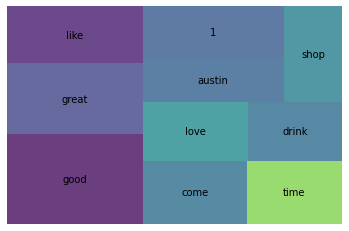

In [27]:
wc_top10 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top10['appears_in_pct'], label=wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [17]:
good_shops = shops[shops['star_rating'] >= 4.0]
bad_shops = shops[shops['star_rating'] <4.0]

wc_good = count(good_shops['lemmas'])
wc_bad = count(bad_shops['lemmas'])

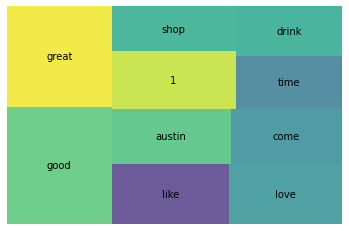

In [28]:
# visualizing top 10 words in good shops
wc_good_top10 = wc_good[wc_good['rank'] <= 10]

squarify.plot(sizes=wc_good_top10['appears_in_pct'], label=wc_good_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

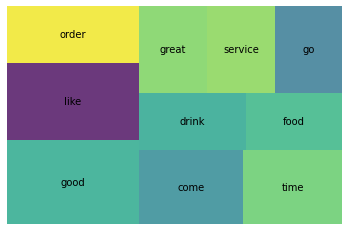

In [29]:
# visualizing top 10 words in bad shops
wc_bad_top10 = wc_bad[wc_bad['rank'] <= 10]

squarify.plot(sizes=wc_bad_top10['appears_in_pct'], label=wc_bad_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [30]:
import sys

# fixes an error of hitting max recursion depth
sys.setrecursionlimit(10**6)

# getting the difference between its percentage in the good list and percentage in the bad list
total_word_list = wc['word'].to_list()
good_word_list = wc_good['word'].to_list()
bad_word_list = wc_bad['word'].to_list()

difference_list = []
for word in total_word_list:
    if word in good_word_list:
        percentage_in_good = wc_good[wc_good['word'] == word]['appears_in_pct'].values
    else:
        percentage_in_good = 0
    
    if word in bad_word_list:
        percentage_in_bad = wc_bad[wc_bad['word'] == word]['appears_in_pct'].values
    else:
        percentage_in_bad = 0
    
    difference = percentage_in_good - percentage_in_bad
    difference_list.append(difference)

# creating a df
word_differences = pd.DataFrame(data={'word': total_word_list, 'difference': difference_list})
word_differences.sort_values(by=['difference'], ascending=False)

,word,difference
1,great,[0.17318529699954982]
22,delicious,[0.13459433454269396]
5,love,[0.12061606772419517]
17,friendly,[0.1082964787302596]
7,austin,[0.08757448160800826]
...,...,...
23,service,[-0.09388963922212512]
135,bad,[-0.09400307195254362]
96,ask,[-0.09840002471685955]
11,order,[-0.127888120900753]


Not surprising the best reviews contained the words: great, delicious, love friendly. The higher rated restaurants were less likely to have reviews that contained the words: service, bad, ask, order and like.

It is interesting that the word like appeared far more in bad reviews than good reviews.

In [ ]:
## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

